<a href="https://colab.research.google.com/github/yosephabate/winc_datascience/blob/main/matplotlib_smoking_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

In [31]:
indicators = pd.read_csv('smoking-indicators.csv', delimiter=';', thousands=',')

In [32]:
indicators.head(2)

,la,Borough name,Smoking Status (2010): current cigarette smoker,Smoking Status (2010): ex-smoker,Smoking Status (2010): never smoked,Smoking Status (2010): Total,Smoking Status (2011): current cigarette smoker,Smoking Status (2011): ex-smoker,Smoking Status (2011): never smoked,Smoking Status (2011): Total,Smoking Status (2012): current cigarette smoker,Smoking Status (2012): ex-smoker,Smoking Status (2012): never smoked,Smoking Status (2012): Total,Smoking Status (2013): current cigarette smoker,Smoking Status (2013): ex-smoker,Smoking Status (2013): never smoked,Smoking Status (2013): Total,Rate of deaths due to smoking: 2007-09,Rate of deaths due to smoking: 2008-10,Rate of deaths due to smoking: 2009-11,Rate of deaths due to smoking: 2010-12,Rate of deaths due to smoking: 2011-13,Quit rate per 100000 population aged 16+: 2008-09 Q1,Quit rate per 100000 population aged 16+: 2008-09 Q2,Quit rate per 100000 population aged 16+: 2008-09 Q3,Quit rate per 100000 population aged 16+: 2008-09 Q4,Quit rate per 100000 population aged 16+: 2009-10 Q1,Quit rate per 100000 population aged 16+: 2009-10 Q2,Quit rate per 100000 population aged 16+: 2009-10 Q3,Quit rate per 100000 population aged 16+: 2009-10 Q4,Quit rate per 100000 population aged 16+: 2010-11 Q1,Quit rate per 100000 population aged 16+: 2010-11 Q2,Quit rate per 100000 population aged 16+: 2010-11 Q3,Quit rate per 100000 population aged 16+: 2010-11 Q4,Quit rate per 100000 population aged 16+: 2011-12 Q1,Quit rate per 100000 population aged 16+: 2011-12 Q2,Quit rate per 100000 population aged 16+: 2011-12 Q3,Quit rate per 100000 population aged 16+: 2011-12 Q4,Quit rate per 100000 population aged 16+: 2012-13 Q1,Quit rate per 100000 population aged 16+: 2012-13 Q2,Quit rate per 100000 population aged 16+: 2012-13 Q3,Quit rate per 100000 population aged 16+: 2012-13 Q4,Quit rate per 100000 population aged 16+: 2013-14 Q1,Quit rate per 100000 population aged 16+: 2013-14 Q2,Quit rate per 100000 population aged 16+: 2013-14 Q3
0,E09000002,Barking and Dagenham,28722,31666,67056,127444,30415,30865,71712,132992,29862,31407,74980,136249,31896,31520,74626,138042,433,421,404,386,384,145,340,496,1022,123,324,506.0,1055,251,431,681,1115,245,431,675,1115,246,437,700,1069,271,529,696
1,E09000003,Barnet,49414,76507,153960,279881,47701,79597,135442,262740,36453,63214,163196,262863,42865,81024,161164,285053,218,215,210,204,205,258,451,649,851,212,390,569.0,823,213,383,541,744,203,376,560,826,226,384,552,750,108,163,234


In [33]:
# Drop borough id
indicators.drop('la', inplace=True, axis=1)
indicators.head(2)

,Borough name,Smoking Status (2010): current cigarette smoker,Smoking Status (2010): ex-smoker,Smoking Status (2010): never smoked,Smoking Status (2010): Total,Smoking Status (2011): current cigarette smoker,Smoking Status (2011): ex-smoker,Smoking Status (2011): never smoked,Smoking Status (2011): Total,Smoking Status (2012): current cigarette smoker,Smoking Status (2012): ex-smoker,Smoking Status (2012): never smoked,Smoking Status (2012): Total,Smoking Status (2013): current cigarette smoker,Smoking Status (2013): ex-smoker,Smoking Status (2013): never smoked,Smoking Status (2013): Total,Rate of deaths due to smoking: 2007-09,Rate of deaths due to smoking: 2008-10,Rate of deaths due to smoking: 2009-11,Rate of deaths due to smoking: 2010-12,Rate of deaths due to smoking: 2011-13,Quit rate per 100000 population aged 16+: 2008-09 Q1,Quit rate per 100000 population aged 16+: 2008-09 Q2,Quit rate per 100000 population aged 16+: 2008-09 Q3,Quit rate per 100000 population aged 16+: 2008-09 Q4,Quit rate per 100000 population aged 16+: 2009-10 Q1,Quit rate per 100000 population aged 16+: 2009-10 Q2,Quit rate per 100000 population aged 16+: 2009-10 Q3,Quit rate per 100000 population aged 16+: 2009-10 Q4,Quit rate per 100000 population aged 16+: 2010-11 Q1,Quit rate per 100000 population aged 16+: 2010-11 Q2,Quit rate per 100000 population aged 16+: 2010-11 Q3,Quit rate per 100000 population aged 16+: 2010-11 Q4,Quit rate per 100000 population aged 16+: 2011-12 Q1,Quit rate per 100000 population aged 16+: 2011-12 Q2,Quit rate per 100000 population aged 16+: 2011-12 Q3,Quit rate per 100000 population aged 16+: 2011-12 Q4,Quit rate per 100000 population aged 16+: 2012-13 Q1,Quit rate per 100000 population aged 16+: 2012-13 Q2,Quit rate per 100000 population aged 16+: 2012-13 Q3,Quit rate per 100000 population aged 16+: 2012-13 Q4,Quit rate per 100000 population aged 16+: 2013-14 Q1,Quit rate per 100000 population aged 16+: 2013-14 Q2,Quit rate per 100000 population aged 16+: 2013-14 Q3
0,Barking and Dagenham,28722,31666,67056,127444,30415,30865,71712,132992,29862,31407,74980,136249,31896,31520,74626,138042,433,421,404,386,384,145,340,496,1022,123,324,506.0,1055,251,431,681,1115,245,431,675,1115,246,437,700,1069,271,529,696
1,Barnet,49414,76507,153960,279881,47701,79597,135442,262740,36453,63214,163196,262863,42865,81024,161164,285053,218,215,210,204,205,258,451,649,851,212,390,569.0,823,213,383,541,744,203,376,560,826,226,384,552,750,108,163,234


In [34]:
# Covert to usable arrays
# For chart 1
boroughs = indicators['Borough name']
smoking_2010_total = indicators['Smoking Status (2010): Total'].to_numpy()

In [35]:
# Covert to usable arrays
# For chart 2
total = indicators[['Borough name', 'Smoking Status (2010): Total', 'Smoking Status (2011): Total', 'Smoking Status (2012): Total', 'Smoking Status (2013): Total']]

In [36]:
# Rename the columns of total dataset
old_total_columns = total.columns
total.columns = ['boroughs', '2010','2011','2012','2013']

In [37]:
# Using all the boroughs makes for an illegible chart
total = total[1:10]
total

,boroughs,2010,2011,2012,2013
1,Barnet,279881,262740,262863,285053
2,Bexley,178952,176035,179150,181661
3,Brent,198154,195767,201238,197874
4,Bromley,237198,244289,254630,249120
5,Camden,191214,197445,192771,199724
6,Croydon,265598,259530,269860,270639
7,Ealing,246136,246455,255094,242131
8,Enfield,219069,224409,222819,222906
9,Greenwich,172809,175004,176343,175944


Text(0.5, 1.0, 'Smokers in London boroughs in 2010')

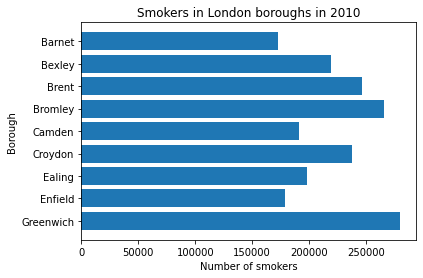

In [43]:
# Chart 1: Smokers in 2010
# Make a horizontal bar chart that shows the number of smokers in London, in 2010, per borough. 
# Each bar should represent the total number of smokers in a single borough.
# Make sure the chart:
#  has a title
#  has a label for the x-axis
#  has a label for the y-axis
#  shows each borough
#  can be read comfortably

fig, ax = plt.subplots()

boroughs = total.loc[:, 'boroughs']
# boroughs
smokers_2010 = total.loc[:, '2010']
# smokers_2010

ax.barh(boroughs[::-1], smokers_2010)
ax.set_xlabel('Number of smokers')
ax.set_ylabel('Borough')
ax.set_title('Smokers in London boroughs in 2010')


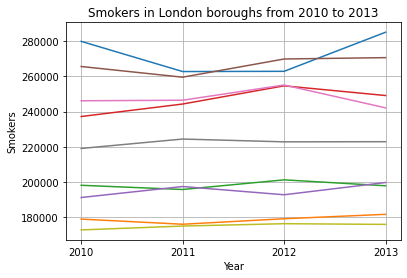

In [57]:
# Chart 2: Active smokers for 10 boroughs
# Make a line chart that shows the number of smokers in London, per borough, 
# for the years 2010 to 2013. The first 10 boroughs should get a line.
# Make sure the chart:
#  has a title
#  has a label for the x-axis
#  has a label for the y-axis
#  shows each borough
#  can be read comfortably
#  has a legend that doesn't obscure the chart too much

years = total.columns[1:]
years

fix, ax = plt.subplots()
for index, row in total.iterrows():
  ax.plot(years, row[1:])

ax.set_xlabel('Year')
ax.set_ylabel('Smokers')
ax.set_title('Smokers in London boroughs from 2010 to 2013')

ax.grid(True)